In [192]:
# Import all the important libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import quandl

In [194]:
yf.__version__

'0.2.54'

In [196]:
data = yf.download('AAPL', start='2015-01-01', end='2025-03-06', auto_adjust=False)
data

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2015-01-02,24.320433,27.332500,27.860001,26.837500,27.847500,212818400
2015-01-05,23.635284,26.562500,27.162500,26.352501,27.072500,257142000
2015-01-06,23.637510,26.565001,26.857500,26.157499,26.635000,263188400
2015-01-07,23.968958,26.937500,27.049999,26.674999,26.799999,160423600
2015-01-08,24.889904,27.972500,28.037500,27.174999,27.307501,237458000
...,...,...,...,...,...,...
2025-02-27,237.300003,237.300003,242.460007,237.059998,239.410004,41153600
2025-02-28,241.839996,241.839996,242.089996,230.199997,236.949997,56833400


In [198]:
# The new versoin of yfinance provides a double index with ticker 'AAPL', we can remove it by the following:
data = data.xs('AAPL',axis=1,level='Ticker')

In [200]:
data

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2015-01-02,24.320433,27.332500,27.860001,26.837500,27.847500,212818400
2015-01-05,23.635284,26.562500,27.162500,26.352501,27.072500,257142000
2015-01-06,23.637510,26.565001,26.857500,26.157499,26.635000,263188400
2015-01-07,23.968958,26.937500,27.049999,26.674999,26.799999,160423600
2015-01-08,24.889904,27.972500,28.037500,27.174999,27.307501,237458000
...,...,...,...,...,...,...
2025-02-27,237.300003,237.300003,242.460007,237.059998,239.410004,41153600
2025-02-28,241.839996,241.839996,242.089996,230.199997,236.949997,56833400
2025-03-03,238.029999,238.029999,244.029999,236.110001,241.789993,47184000


In [202]:
# We would need the date as a column further down the line so lets reset the index:
data = data.reset_index()

In [204]:
data['Ticker'] = 'AAPL'
data

Price,Date,Adj Close,Close,High,Low,Open,Volume,Ticker
0,2015-01-02,24.320433,27.332500,27.860001,26.837500,27.847500,212818400,AAPL
1,2015-01-05,23.635284,26.562500,27.162500,26.352501,27.072500,257142000,AAPL
2,2015-01-06,23.637510,26.565001,26.857500,26.157499,26.635000,263188400,AAPL
3,2015-01-07,23.968958,26.937500,27.049999,26.674999,26.799999,160423600,AAPL
4,2015-01-08,24.889904,27.972500,28.037500,27.174999,27.307501,237458000,AAPL
...,...,...,...,...,...,...,...,...
2553,2025-02-27,237.300003,237.300003,242.460007,237.059998,239.410004,41153600,AAPL
2554,2025-02-28,241.839996,241.839996,242.089996,230.199997,236.949997,56833400,AAPL
2555,2025-03-03,238.029999,238.029999,244.029999,236.110001,241.789993,47184000,AAPL
2556,2025-03-04,235.929993,235.929993,240.070007,234.679993,237.710007,53798100,AAPL


In [206]:
# Choose the most relevent columns
data = data[['Date','Ticker','Close','Adj Close']]

In [208]:
# Rename them for convenience: 
data.columns = ['date','ticker','close','adj_close']

In [210]:
import pandas_ta as ta

In [212]:
# Add technical indicators
data['RSI'] = ta.rsi(data['close'], length=15)
data['EMAF'] = ta.ema(data['close'], length=20)
data['EMAM'] = ta.ema(data['close'], length=100)
data['EMAS'] = ta.ema(data['close'], length=150)

/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_12943/1843302898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RSI'] = ta.rsi(data['close'], length=15)
/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_12943/1843302898.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['EMAF'] = ta.ema(data['close'], length=20)
/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_12943/1843302898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [214]:
# Lets define the target variable: (next day's closing price)
data['TargetNextClose'] = data['adj_close'].shift(-1)

In [216]:
# Missing values from the above calculation are expected:
data

,date,ticker,close,adj_close,RSI,EMAF,EMAM,EMAS,TargetNextClose
0,2015-01-02,AAPL,27.332500,24.320433,NaN,NaN,NaN,NaN,23.635284
1,2015-01-05,AAPL,26.562500,23.635284,NaN,NaN,NaN,NaN,23.637510
2,2015-01-06,AAPL,26.565001,23.637510,NaN,NaN,NaN,NaN,23.968958
3,2015-01-07,AAPL,26.937500,23.968958,NaN,NaN,NaN,NaN,24.889904
4,2015-01-08,AAPL,27.972500,24.889904,NaN,NaN,NaN,NaN,24.916594
...,...,...,...,...,...,...,...,...,...
2553,2025-02-27,AAPL,237.300003,237.300003,47.646537,239.806508,234.594200,229.606471,241.839996
2554,2025-02-28,AAPL,241.839996,241.839996,53.267287,240.000174,234.737681,229.768505,238.029999
2555,2025-03-03,AAPL,238.029999,238.029999,48.577859,239.812538,234.802876,229.877928,235.929993
2556,2025-03-04,AAPL,235.929993,235.929993,46.177118,239.442772,234.825195,229.958088,235.740005


In [218]:
# Lets drop all the null rows:
data.dropna(inplace=True)

In [220]:
data

,date,ticker,close,adj_close,RSI,EMAF,EMAM,EMAS,TargetNextClose
149,2015-08-06,AAPL,28.782499,25.935978,29.615278,30.494932,31.123954,31.080817,26.023844
150,2015-08-07,AAPL,28.879999,26.023844,30.974104,30.341128,31.079519,31.051667,26.969995
151,2015-08-10,AAPL,29.930000,26.969995,43.549042,30.301973,31.056757,31.036810,25.566532
152,2015-08-11,AAPL,28.372499,25.566532,33.771217,30.118214,31.003603,31.001521,25.960764
153,2015-08-12,AAPL,28.809999,25.960764,37.963259,29.993622,30.960165,30.972495,25.940483
...,...,...,...,...,...,...,...,...,...
2552,2025-02-26,AAPL,240.360001,240.360001,51.546642,240.070351,234.539538,229.503202,237.300003
2553,2025-02-27,AAPL,237.300003,237.300003,47.646537,239.806508,234.594200,229.606471,241.839996
2554,2025-02-28,AAPL,241.839996,241.839996,53.267287,240.000174,234.737681,229.768505,238.029999
2555,2025-03-03,AAPL,238.029999,238.029999,48.577859,239.812538,234.802876,229.877928,235.929993


In [222]:
# These are the columns that will be scaled:
data.columns[3:]

Index(['adj_close', 'RSI', 'EMAF', 'EMAM', 'EMAS', 'TargetNextClose'], dtype='object')

In [224]:
# Lets also reset the index since it was changed during removing the NA:
data.reset_index(inplace=True)

In [226]:
data.columns[3:]

Index(['close', 'adj_close', 'RSI', 'EMAF', 'EMAM', 'EMAS', 'TargetNextClose'], dtype='object')

In [228]:
# Normalize the data - Use a minmax scaler that is between 0-1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data[data.columns[3:]])

In [230]:
# Convert the scaled data into a dataframe, will be usefull for different models:
data_scaled_df = pd.DataFrame(data_scaled)

In [232]:
data_scaled_df

,0,1,2,3,4,5,6
0,0.026212,0.022101,0.108313,0.029170,0.029988,0.028063,0.022470
1,0.026625,0.022470,0.128443,0.028487,0.029777,0.027920,0.026445
2,0.031066,0.026445,0.314734,0.028313,0.029668,0.027848,0.020549
3,0.024478,0.020549,0.169881,0.027497,0.029415,0.027675,0.022205
4,0.026329,0.022205,0.231984,0.026944,0.029208,0.027533,0.022120
...,...,...,...,...,...,...,...
2403,0.921078,0.922812,0.433215,0.960001,0.998640,0.997777,0.909958
2404,0.908135,0.909958,0.375437,0.958829,0.998900,0.998282,0.929029
2405,0.927337,0.929029,0.458705,0.959690,0.999583,0.999073,0.913024
2406,0.911223,0.913024,0.389234,0.958856,0.999894,0.999608,0.904203


In [234]:
data

,index,date,ticker,close,adj_close,RSI,EMAF,EMAM,EMAS,TargetNextClose
0,149,2015-08-06,AAPL,28.782499,25.935978,29.615278,30.494932,31.123954,31.080817,26.023844
1,150,2015-08-07,AAPL,28.879999,26.023844,30.974104,30.341128,31.079519,31.051667,26.969995
2,151,2015-08-10,AAPL,29.930000,26.969995,43.549042,30.301973,31.056757,31.036810,25.566532
3,152,2015-08-11,AAPL,28.372499,25.566532,33.771217,30.118214,31.003603,31.001521,25.960764
4,153,2015-08-12,AAPL,28.809999,25.960764,37.963259,29.993622,30.960165,30.972495,25.940483
...,...,...,...,...,...,...,...,...,...,...
2403,2552,2025-02-26,AAPL,240.360001,240.360001,51.546642,240.070351,234.539538,229.503202,237.300003
2404,2553,2025-02-27,AAPL,237.300003,237.300003,47.646537,239.806508,234.594200,229.606471,241.839996
2405,2554,2025-02-28,AAPL,241.839996,241.839996,53.267287,240.000174,234.737681,229.768505,238.029999
2406,2555,2025-03-03,AAPL,238.029999,238.029999,48.577859,239.812538,234.802876,229.877928,235.929993


In [236]:
# add the date column into the scaled dataframe:
data_scaled_df = pd.concat([data_scaled_df, data['date']], axis=1)
data_scaled_df

,0,1,2,3,4,5,6,date
0,0.026212,0.022101,0.108313,0.029170,0.029988,0.028063,0.022470,2015-08-06
1,0.026625,0.022470,0.128443,0.028487,0.029777,0.027920,0.026445,2015-08-07
2,0.031066,0.026445,0.314734,0.028313,0.029668,0.027848,0.020549,2015-08-10
3,0.024478,0.020549,0.169881,0.027497,0.029415,0.027675,0.022205,2015-08-11
4,0.026329,0.022205,0.231984,0.026944,0.029208,0.027533,0.022120,2015-08-12
...,...,...,...,...,...,...,...,...
2403,0.921078,0.922812,0.433215,0.960001,0.998640,0.997777,0.909958,2025-02-26
2404,0.908135,0.909958,0.375437,0.958829,0.998900,0.998282,0.929029,2025-02-27
2405,0.927337,0.929029,0.458705,0.959690,0.999583,0.999073,0.913024,2025-02-28
2406,0.911223,0.913024,0.389234,0.958856,0.999894,0.999608,0.904203,2025-03-03


In [238]:
data_scaled_df

,0,1,2,3,4,5,6,date
0,0.026212,0.022101,0.108313,0.029170,0.029988,0.028063,0.022470,2015-08-06
1,0.026625,0.022470,0.128443,0.028487,0.029777,0.027920,0.026445,2015-08-07
2,0.031066,0.026445,0.314734,0.028313,0.029668,0.027848,0.020549,2015-08-10
3,0.024478,0.020549,0.169881,0.027497,0.029415,0.027675,0.022205,2015-08-11
4,0.026329,0.022205,0.231984,0.026944,0.029208,0.027533,0.022120,2015-08-12
...,...,...,...,...,...,...,...,...
2403,0.921078,0.922812,0.433215,0.960001,0.998640,0.997777,0.909958,2025-02-26
2404,0.908135,0.909958,0.375437,0.958829,0.998900,0.998282,0.929029,2025-02-27
2405,0.927337,0.929029,0.458705,0.959690,0.999583,0.999073,0.913024,2025-02-28
2406,0.911223,0.913024,0.389234,0.958856,0.999894,0.999608,0.904203,2025-03-03


In [240]:
# Prepare input (X) and output (y) data
backcandles = 30  # Number of past days to use for prediction
X = []
y = []
for i in range(backcandles, len(data_scaled)):
    X.append(data_scaled[i-backcandles:i, :-1])  # Use all columns except the target
    y.append(data_scaled[i, -1])  # Target is the next day's closing price
X, y = np.array(X), np.array(y)


In [242]:
# Split into training and testing sets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [244]:
# LSTM Model Implementation:
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Activation
from tensorflow.keras import Model, optimizers

# Build the LSTM model
lstm_input = Input(shape=(backcandles, X_train.shape[2]), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)


In [246]:
# Compile the model
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')

In [248]:
# Train the model
history = model.fit(X_train, y_train, batch_size=15, epochs=30, shuffle=True, validation_split=0.1)

Epoch 1/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0030 - val_loss: 3.8189e-04
Epoch 2/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.4960e-04 - val_loss: 4.2466e-04
Epoch 3/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.7403e-04 - val_loss: 6.6954e-04
Epoch 4/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.6797e-04 - val_loss: 5.1811e-04
Epoch 5/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.7018e-04 - val_loss: 3.5362e-04
Epoch 6/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.6407e-04 - val_loss: 3.4610e-04
Epoch 7/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.5188e-04 - val_loss: 3.8899e-04
Epoch 8/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.3864e-04 - val_loss: 2.9950e-04
Epoch 9/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.4238e-04 - val_loss: 3.1534e-04
Epoch 10/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.2343e-04 - val_loss: 3.1031e-04
Epoch 11/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.

In [249]:
# Performance Evaluation
# Make predictions
y_pred_lstm = model.predict(X_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [250]:
# Inverse transform predictions and actual values
y_test_original = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], y_test.reshape(-1, 1)), axis=1))[:, -1]
y_pred_original_lstm = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], y_pred_lstm.reshape(-1, 1)), axis=1))[:, -1]


In [254]:
from sklearn.metrics import mean_squared_error
lstm_rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original_lstm))
print(f"LSTM RMSE: {lstm_rmse}")

LSTM RMSE: 7.623668678446816


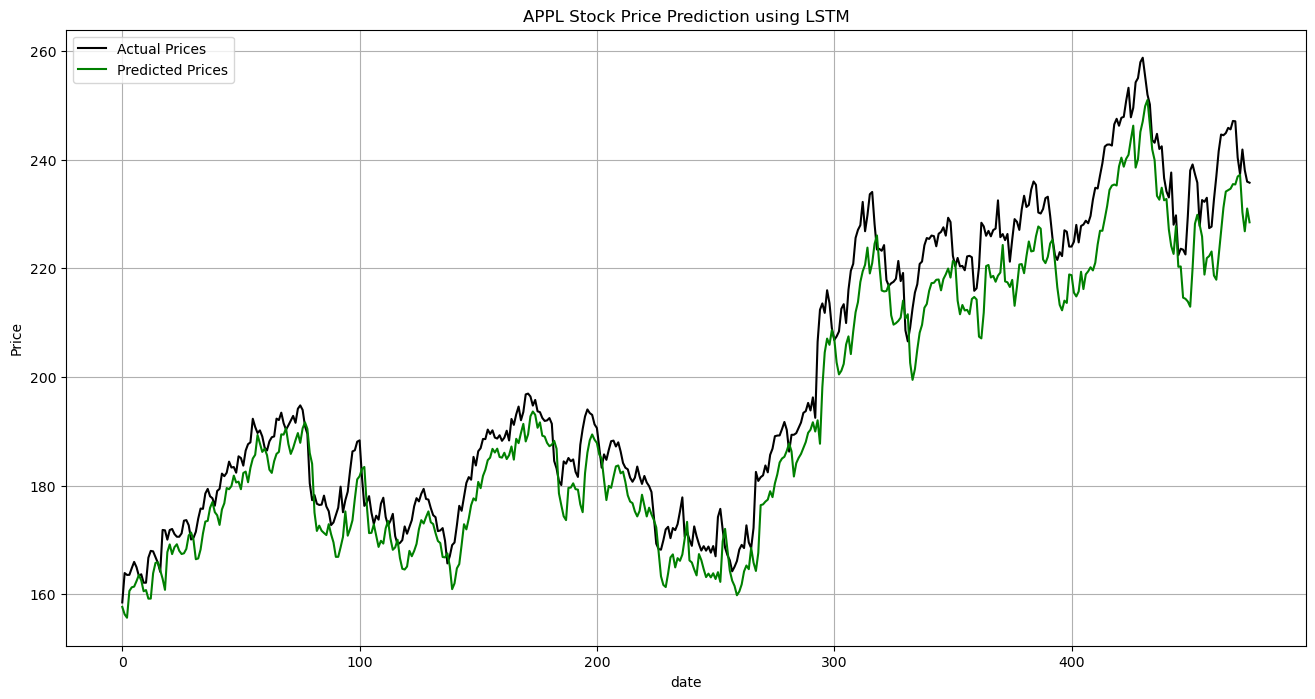

In [256]:
# Plot the results
plt.figure(figsize=(16, 8))
plt.plot(y_test_original, color='black', label='Actual Prices')
plt.plot(y_pred_original_lstm, color='green', label='Predicted Prices')
plt.title("APPL Stock Price Prediction using LSTM")
plt.xlabel('date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

In [264]:
# Rename the column:
data_scaled_df.columns = ['close', 'adj_close', 'RSI', 'EMAF', 'EMAM', 'EMAS', 'TargetNextClose','date']

In [266]:
# Comparison to Traditional Methods

from statsmodels.tsa.arima.model import ARIMA
# ARIMA Model
arima_model = ARIMA(data_scaled_df['adj_close'], order=(3, 1, 3))
arima_fit = arima_model.fit()
arima_predictions = arima_fit.predict(start=len(data_scaled_df)-len(y_test), end=len(data_scaled_df)-1)

In [268]:
arima_predictions = np.array(arima_predictions).reshape(-1, 1)
arima_predictions_original = scaler.inverse_transform(
    np.concatenate((X_test[:, -1, :], arima_predictions), axis=1)
)[:, -1]

In [270]:
# Prophet Model
from prophet import Prophet

# Prophet does not require us to scale the data for the model:
# Prophet is designed to work directly with raw, unscaled data
prophet_data = data[['date', 'adj_close']].rename(columns={'date': 'ds', 'adj_close': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_data)
future = prophet_model.make_future_dataframe(periods=len(y_test), freq='D')

prophet_forecast = prophet_model.predict(future)
prophet_predictions = prophet_forecast['yhat'].iloc[-len(y_test):].values



22:47:54 - cmdstanpy - INFO - Chain [1] start processing
22:47:54 - cmdstanpy - INFO - Chain [1] done processing


In [272]:
# Compare RMSE
arima_rmse = np.sqrt(mean_squared_error(y_test_original, arima_predictions_original))
prophet_rmse = np.sqrt(mean_squared_error(y_test_original, prophet_predictions))
print(f"ARIMA RMSE: {arima_rmse}")
print(f"Prophet RMSE: {prophet_rmse}")

ARIMA RMSE: 4.032926029066343
Prophet RMSE: 68.03384581796823


In [274]:
'''
The large difference in RMSE suggests that ARIMA is fitting the data well, while Prophet is struggling. 
This could be due to Prophet's default assumptions about seasonality and trend not aligning with the data, 
insufficient tuning of Prophet's hyperparameters, or a poor handling of short-term variations compared to ARIMA, 
which is more flexible for autoregressive patterns.

'''

"\nThe large difference in RMSE suggests that ARIMA is fitting the data well, while Prophet is struggling. \nThis could be due to Prophet's default assumptions about seasonality and trend not aligning with the data, \ninsufficient tuning of Prophet's hyperparameters, or a poor handling of short-term variations compared to ARIMA, \nwhich is more flexible for autoregressive patterns.\n\n"

In [276]:
"""
LSTM Strengths:
- Captures complex temporal dependencies in time series data.
- Can model non-linear relationships.
- Performs well with large datasets.

LSTM Weaknesses:
- Computationally expensive and requires significant resources.
- Requires careful hyperparameter tuning.
- May overfit if not regularized properly.

Traditional Methods (ARIMA, Prophet):
- Simpler and faster to implement.
- Interpretable and well-suited for linear trends.
- May struggle with non-linear patterns and long-term dependencies.
"""

'\nLSTM Strengths:\n- Captures complex temporal dependencies in time series data.\n- Can model non-linear relationships.\n- Performs well with large datasets.\n\nLSTM Weaknesses:\n- Computationally expensive and requires significant resources.\n- Requires careful hyperparameter tuning.\n- May overfit if not regularized properly.\n\nTraditional Methods (ARIMA, Prophet):\n- Simpler and faster to implement.\n- Interpretable and well-suited for linear trends.\n- May struggle with non-linear patterns and long-term dependencies.\n'

In [278]:
# Hyperparameter Tuning
# Experiment with GRU - LSTM architectures
from tensorflow.keras.layers import GRU

gru_input = Input(shape=(backcandles, X_train.shape[2]), name='gru_input')
gru_layer = GRU(150, name='gru_layer')(gru_input)
dense_layer = Dense(1, name='dense_layer')(gru_layer)
output = Activation('linear', name='output')(dense_layer)
gru_model = Model(inputs=gru_input, outputs=output)


In [280]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Build the GRU model
gru_model = Sequential()
gru_model.add(GRU(150, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
gru_model.add(Dense(1, activation='linear'))

# Compile the model
adam = Adam(learning_rate=0.001)
gru_model.compile(optimizer=adam, loss='mse')

# Train the model
history = gru_model.fit(
    X_train, y_train,
    batch_size=15,
    epochs=30,
    shuffle=True,
    validation_split=0.1
)

Epoch 1/30


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0069 - val_loss: 3.9692e-04
Epoch 2/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.9902e-04 - val_loss: 5.1456e-04
Epoch 3/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.6996e-04 - val_loss: 3.7152e-04
Epoch 4/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.2926e-04 - val_loss: 5.5672e-04
Epoch 5/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.5214e-04 - val_loss: 4.7896e-04
Epoch 6/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.2553e-04 - val_loss: 6.3812e-04
Epoch 7/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.5664e-04 - val_loss: 4.0943e-04
Epoch 8/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.3443e-04 - val_loss: 2.9620e-04
Epoch 9/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.3204e-04 - val_loss: 2.8696e-04
Epoch 10/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.3416e-04 - val_loss: 2.9318e-04
Epoch 11/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.1624e-04 - 

In [282]:
# Evaluate GRU performance
gru_predictions = gru_model.predict(X_test)
gru_predictions_original = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], gru_predictions.reshape(-1, 1)), axis=1))[:, -1]
gru_rmse = np.sqrt(mean_squared_error(y_test_original, gru_predictions_original))
print(f"GRU RMSE: {gru_rmse}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
GRU RMSE: 4.741254050512447


In [284]:
# Comparison:
pd.DataFrame({'Errors':[np.round(lstm_rmse,2),np.round(arima_rmse,2),
                        np.round(prophet_rmse,2),np.round(gru_rmse,2)]}, index=['LSTM RMSE','ARIMA RMSE','PROPHET RMSE','GRU RMSE'])

,Errors
LSTM RMSE,7.62
ARIMA RMSE,4.03
PROPHET RMSE,68.03
GRU RMSE,4.74


In [286]:
'''
ARIMA achieving the lowest RMSE suggests it best captures the underlying time series patterns, 
likely due to strong autocorrelations. GRU and LSTM perform worse than ARIMA but better than Prophet, 
indicating that deep learning models may struggle with limited data or require more tuning. 

'''

'\nARIMA achieving the lowest RMSE suggests it best captures the underlying time series patterns, \nlikely due to strong autocorrelations. GRU and LSTM perform worse than ARIMA but better than Prophet, \nindicating that deep learning models may struggle with limited data or require more tuning. \n\n'

In [288]:
# Lets tune the prophet model.

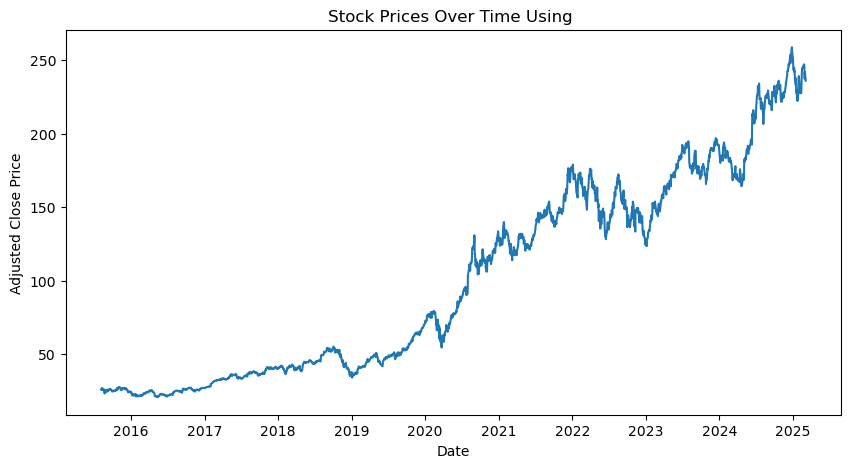

In [290]:
# Lets visualise the model:
plt.figure(figsize=(10,5))
plt.plot(prophet_data['ds'], prophet_data['y'])
plt.title("Stock Prices Over Time Using ")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.show()

In [292]:
# As we can see the prices are quite volatile, so instead what we can do is try weekly aggregation to smooth out noise

In [294]:
prophet_data = data[['date', 'adj_close']].rename(columns={'date': 'ds', 'adj_close': 'y'})


#This is being added to smooth out the noise:
prophet_data = prophet_data.resample('W', on='ds').mean().reset_index()

# Set logistic growth bounds (cap and floor)
# Set an upper bound (cap) and lower bound (floor)
prophet_data['cap'] = prophet_data['y'].max() * 1.2  # Set an upper bound
prophet_data['floor'] = prophet_data['y'].min() * 0.8  # Set a lower bound


# Prophet defaults to a linear growth model, which may not capture trends well in financial data.
# Lets try a logistic growth model:

# Since adj_close has abrupt changes, adjusting the changepoint prior scale will help Prophet capture these changes:
prophet_model = Prophet(growth='logistic', changepoint_prior_scale=0.1)
prophet_model.fit(prophet_data)


future1= prophet_model.make_future_dataframe(periods=len(y_test), freq='D')

# Add 'cap' and 'floor' columns to the future dataframe
future1['cap'] = prophet_data['cap'].max()  # Use the same cap as in the training data
future1['floor'] = prophet_data['floor'].min()  # Use the same floor as in the training data

prophet_forecast1 = prophet_model.predict(future1)
prophet_predictions1 = prophet_forecast1['yhat'].iloc[-len(y_test):].values

# We can also use a hybrid approach by combining different models and giving the most weight to the best performing model(ARIMA)
prophet_hybrid_predictions = 0.7 * arima_predictions_original + 0.2 * prophet_predictions1 +0.1*gru_predictions_original
prophet_hybrid_predictions

22:48:35 - cmdstanpy - INFO - Chain [1] start processing
22:48:35 - cmdstanpy - INFO - Chain [1] done processing


array([173.68803982, 172.64155363, 172.13106543, 176.33493116,
       176.02383029, 175.95501824, 177.10271885, 177.98155307,
       177.22125422, 175.8919831 , 176.25010424, 174.99078704,
       175.015731  , 178.71338102, 179.67730421, 179.61327455,
       178.92407747, 178.14386412, 176.88041589, 182.98470757,
       182.91153628, 181.46645238, 183.18458919, 183.37348099,
       182.60816869, 182.21523271, 182.29828445, 182.81698755,
       184.71667762, 184.79739277, 184.0404496 , 181.99515582,
       182.3147757 , 183.24221346, 185.0860778 , 186.55394981,
       186.53469054, 188.86959479, 189.57615626, 188.41672571,
       188.20295557, 187.10227533, 189.30735113, 189.58928958,
       191.75573057, 191.44008211, 191.96337615, 193.69204929,
       192.72707992, 192.86575858, 192.02964011, 194.47713365,
       194.20830542, 193.00238589, 195.35752085, 196.28514007,
       196.52757968, 199.99070077, 198.77619843, 197.90033479,
       198.44655244, 197.47277479, 195.7951781 , 195.41

In [298]:
prophet_hybrid_predictions_rmse = np.sqrt(mean_squared_error(y_test_original, prophet_hybrid_predictions))
print(f"Tuned Prophet prediction: {prophet_hybrid_predictions_rmse}")

Tuned Prophet prediction: 10.730674545840984


In [300]:
pd.DataFrame({'Errors':[np.round(lstm_rmse,2),np.round(arima_rmse,2),
                        np.round(prophet_hybrid_predictions_rmse,2),np.round(gru_rmse,2)]}, index=['LSTM RMSE','ARIMA RMSE','HYBRID PROPHET RMSE','GRU RMSE'])

,Errors
LSTM RMSE,7.62
ARIMA RMSE,4.03
HYBRID PROPHET RMSE,10.73
GRU RMSE,4.74


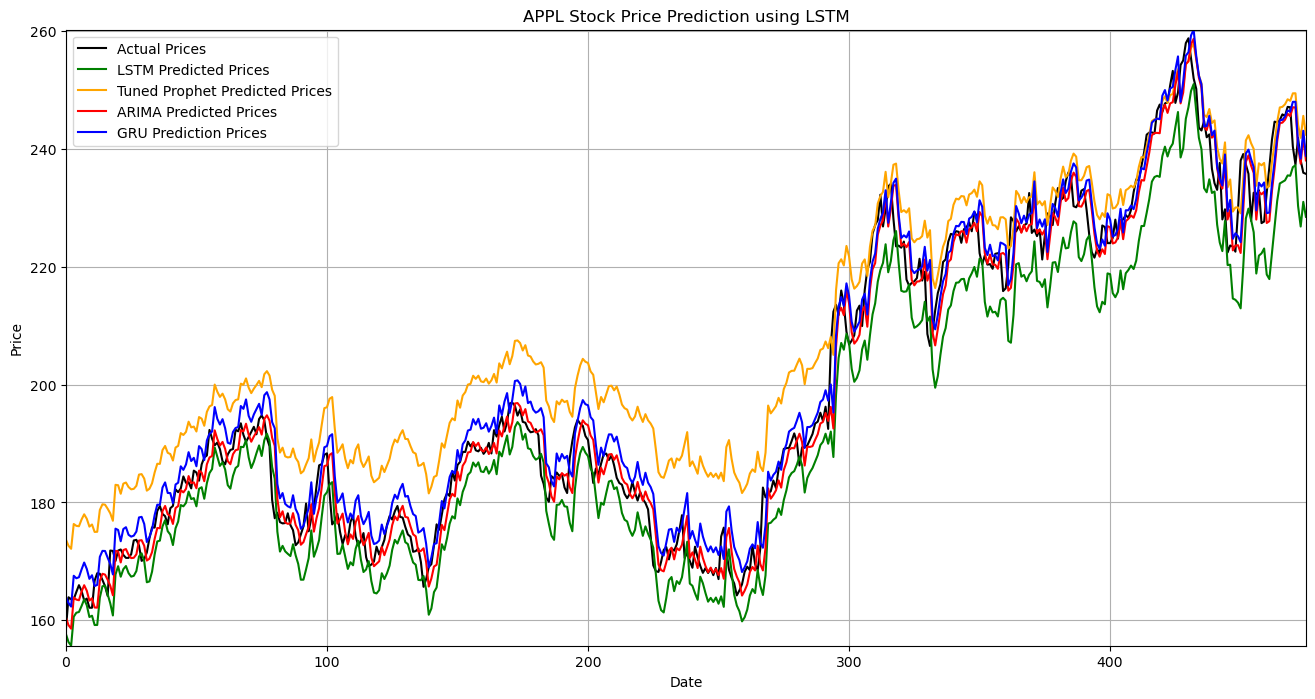

In [310]:
import matplotlib.pyplot as plt

# Create the figure and axis
fig, ax = plt.subplots(figsize=(16, 8))

# Plot actual and predicted prices
ax.plot(y_test_original, color='black', label='Actual Prices')
ax.plot(y_pred_original_lstm, color='green', label='LSTM Predicted Prices')
ax.plot(prophet_hybrid_predictions, color='orange', label='Tuned Prophet Predicted Prices')
ax.plot(arima_predictions_original, color='red', label='ARIMA Predicted Prices')
ax.plot(gru_predictions_original, color='blue', label='GRU Prediction Prices')

# Autoscale and improve visualization
ax.autoscale(axis='both', tight=True)
ax.set_title("APPL Stock Price Prediction using LSTM")
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.grid(True)
ax.legend()

# Show the plot
plt.show()
